<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section4_Lab4_Triki_hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVES:**

Understand the concept of unsupervised learning

Apply k-Means clustering on unlabeled data

Evaluate clusters with inertia & silhouette score

Visualize results using Principal Component Analysis (PCA)

Compare clustering with ground truth labels (for learning purposes only)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target  # for evaluation only
print("Shape:", X.shape)
X.head()

Shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
#n_init=10 runs the K-Means algorithm 10 times with different
# centroid seeds and chooses the best result in terms of inertia

clusters = kmeans.fit_predict(X)

print("Cluster assignments:", np.unique(clusters))

print("Inertia (lower is better):", kmeans.inertia_)
#the inertia, which is a measure of how internally coherent clusters are

sil_score = silhouette_score(X, clusters)
print("Silhouette Score:", sil_score)
#Silhouette Score: between -1 and 1; higher = better separation.

Cluster assignments: [0 1 2]
Inertia (lower is better): 78.851441426146
Silhouette Score: 0.5528190123564095


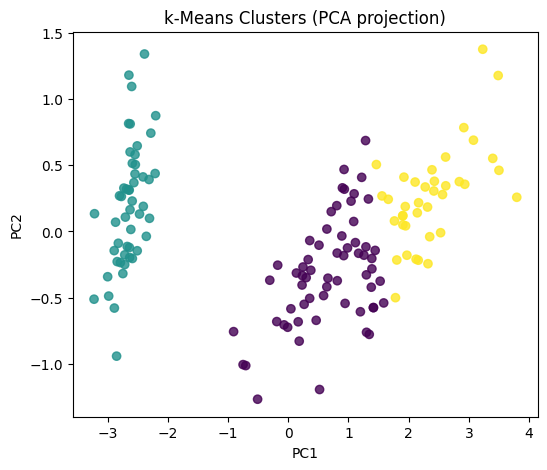

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
#reduce the dataset's dimensionality down to 2 principal components


plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.8)
plt.title("k-Means Clusters (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#we Visualize the 2 remaining PCA on the axes and the data points are colored
#based on the clusters they assigned too in the k-means model

well lets see how did our model perform by visuaizing the real classes (for understanding)

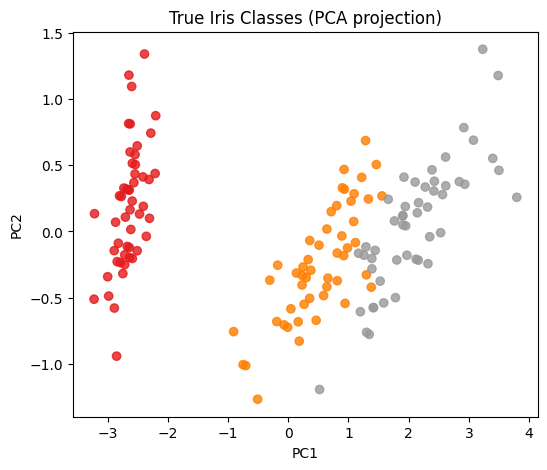

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap="Set1", alpha=0.8)
plt.title("True Iris Classes (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

russults seems to be quite good
so lets Experiment our model with different k values


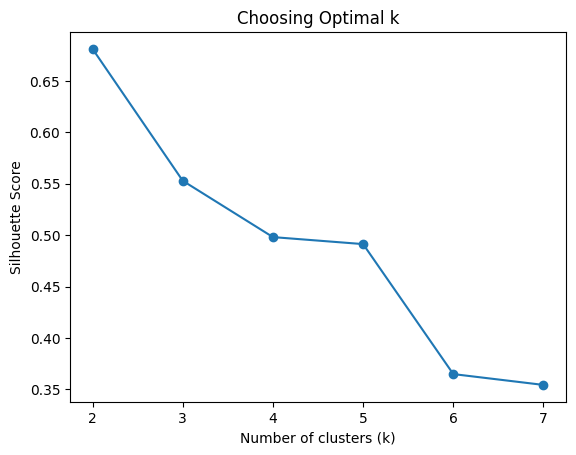

In [ ]:
scores = []
ks = range(2, 8)
for k in ks:
  km = KMeans(n_clusters=k, random_state=42, n_init=10)
  preds = km.fit_predict(X)
  score = silhouette_score(X, preds)
  scores.append(score)
plt.plot(ks, scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Choosing Optimal k")
plt.show()


1. Why do we use unsupervised learning when labels are not available?

Unsupervised learning is essential when you have a dataset without predefined output labels or target variables. Its primary goal is to find hidden patterns, structures, or groupings within the data on its own. For example, in our case, if we didn't know the Iris species, K-Means would help us discover natural groupings based on the flower's physical characteristics. It's used for tasks like customer segmentation, anomaly detection, data compression, and exploratory data analysis.

2. What do inertia and silhouette score tell us?

Inertia: This metric measures the sum of squared distances between each point and the centroid of its assigned cluster. A lower inertia generally indicates that the clusters are more compact and coherent. However, inertia always decreases as the number of clusters (k) increases, so it can't be used alone to determine the optimal k.

Silhouette Score: This metric provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1. A high silhouette score (closer to 1) means that data points are well-matched to their own cluster and well-separated from neighboring clusters. A score around 0 indicates overlapping clusters, and negative scores suggest that data points might have been assigned to the wrong cluster.

3. Which k gave the best silhouette score? Did it match the number of true classes?

Looking at the scores variable from the last executed cell, the silhouette scores for k from 2 to 7 are: [0.681, 0.553, 0.498, 0.491, 0.365, 0.354]. The highest silhouette score is 0.681 which occurred when k=2.
No, it did not match the number of true classes. The Iris dataset has 3 true species (classes), but the optimal silhouette score was achieved with k=2. This often happens because the clustering algorithm finds the most distinct groupings based purely on feature similarity, which might not always align perfectly with human-defined labels, especially if the clusters are naturally overlapping in feature space.

4. How does PCA help visualize high-dimensional data?

PCA (Principal Component Analysis) is a dimensionality reduction technique. High-dimensional data (like our 4-feature Iris dataset) is difficult to visualize directly. PCA transforms the data into a new coordinate system where the first principal component (PC1) captures the most variance in the data, the second principal component (PC2) captures the second most variance, and so on. By selecting the top 2 or 3 principal components, we can project the high-dimensional data onto a 2D or 3D plane, allowing us to visualize the data and identify patterns, such as clusters, that might not be apparent in the original high-dimensional space.

5. Why don’t clusters always perfectly match real-world labels?

Algorithm's Objective vs. True Labels: Unsupervised learning algorithms like K-Means group data based purely on the inherent similarity of features. They don't have access to the real-world labels during training. Real-world labels, however, might be defined based on criteria that are not perfectly captured by the numerical features, or they might involve subjective human categorization.
Assumptions of the Algorithm: K-Means, for example, assumes that clusters are spherical and of similar variance. If the true underlying clusters are irregular shapes or have very different densities, K-Means might struggle to identify them correctly.
Feature Limitations: The features used might not be sufficient to perfectly distinguish the real-world classes. There might be overlap in feature space between different true classes.
Natural Overlap: Even in ideal scenarios, some real-world classes might naturally overlap in their feature distributions, making it impossible for any algorithm to perfectly separate them based solely on those features. The Iris versicolor and virginica species, for instance, are known to have some overlap in their measurements.
